# Arttu Korpela's Bachelors Thesis on ASPA's error data

## This file contain's the scripts to handle the JSON error data and visualization of said data

The first code-block contains the importation of packages and functions. It also handles the opening of the JSON-file that has the ASPA's error information form LUT-Universitys *Basics of programming* -course.

The *error*-variable contains a list/array of each individual error that was reported.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from library import categorize_error_type, errors_per_return, extract_errors

filename = "anonymisoitu_aspa 1.json"
errors = []
sns.set_theme(style='whitegrid')
sns.set_context('paper')
#palette = sns.color_palette("deep")  
#sns.set_palette(["skyblue"])
plt.rcParams.update({
    'font.size': 14,  # General font size
    'axes.labelsize': 16,  # Axis labels
    'axes.titlesize': 18,  # Title
    'xtick.labelsize': 12,  # X-axis tick labels
    'ytick.labelsize': 12,  # Y-axis tick labels
    'legend.title_fontsize': 12,  # Legend
    'legend.fontsize': 10,  # Legend text
    'figure.figsize': (14, 8)  # Figure size
})

with open(filename, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract analysis results with violation_id

errors = extract_errors(data)


### 1. Grouping of errors by their *error_id* and plotting the ammounts

This first code-block contains the counting the total ammounts for each *error_id* and creating a barplot that has each type in increasing order

  violation_id  count
0          AR1     13
1          AR3     25
2        AR3-3      9
3          AR6     19
4        AR6-3     10
5        AR6-5     23
6          MR1    137
7        PK1-2     24


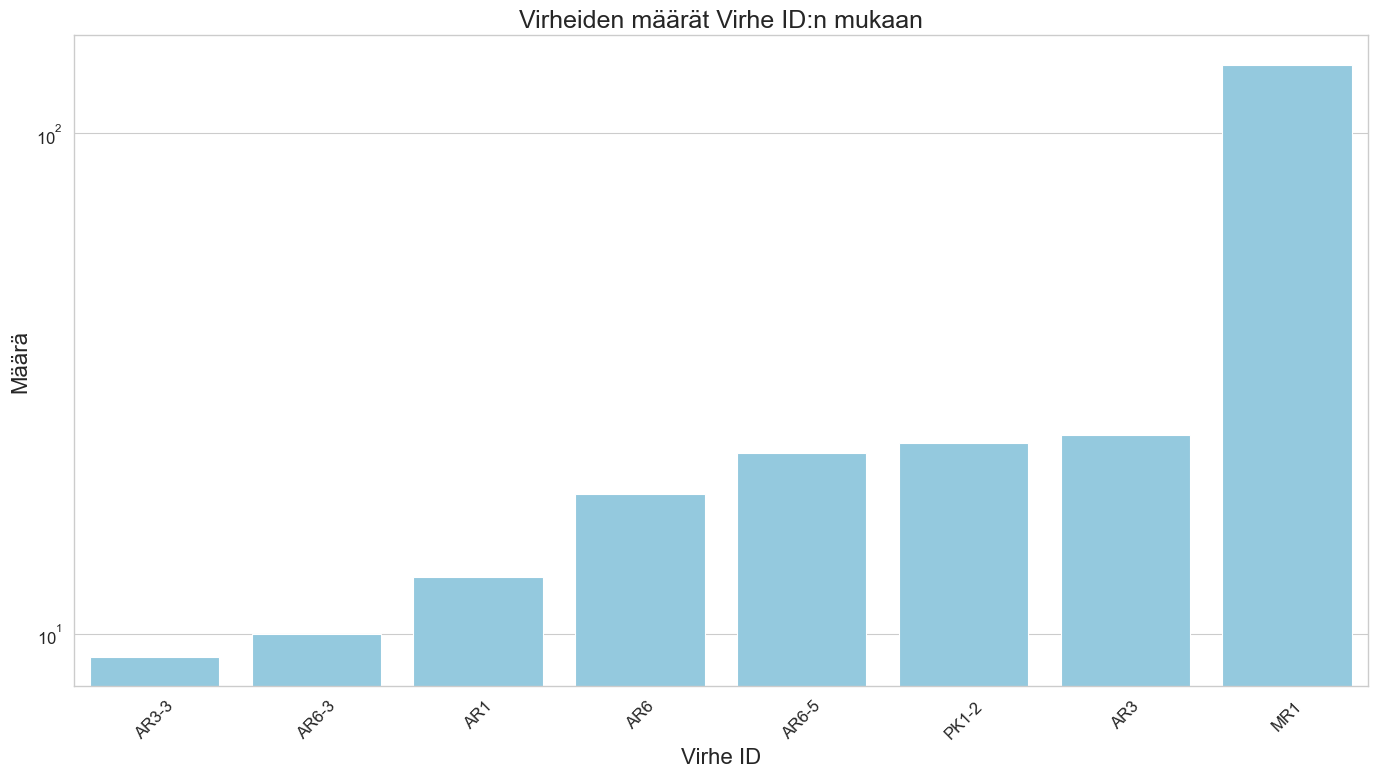

In [36]:


# Create DataFrame and group by 'violation_id'
df = pd.DataFrame(errors)
#print(df)
violation_counts = df.groupby('violation_id').size().reset_index(name='count')

# Calculate the total count for each violation_id and sort by it
total_counts = violation_counts.groupby('violation_id')['count'].sum().sort_values()
sorted_violation_ids = total_counts.index.tolist()



print(violation_counts)

plt.figure(figsize=(14, 8))
sns.barplot(data=violation_counts, x='violation_id', y='count',order= sorted_violation_ids, color='skyblue')
plt.title('Virheiden määrät Virhe ID:n mukaan')
plt.xlabel('Virhe ID')
plt.ylabel('Määrä')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()


### 2. Grouping errors by their category and plotting their total ammounts

Each error is grouped by it's category. There are six different categiries of errors that ASPA looks at:

1. *basic*
2. *function*
3. *library*
4. *exception_handling*
5. *file_handling*
6. *data_structures*

After categorisation a bar plot is created showing the total ammounts for each category

             category  count
0  exception_handling     24
1            function     99
2             library    137


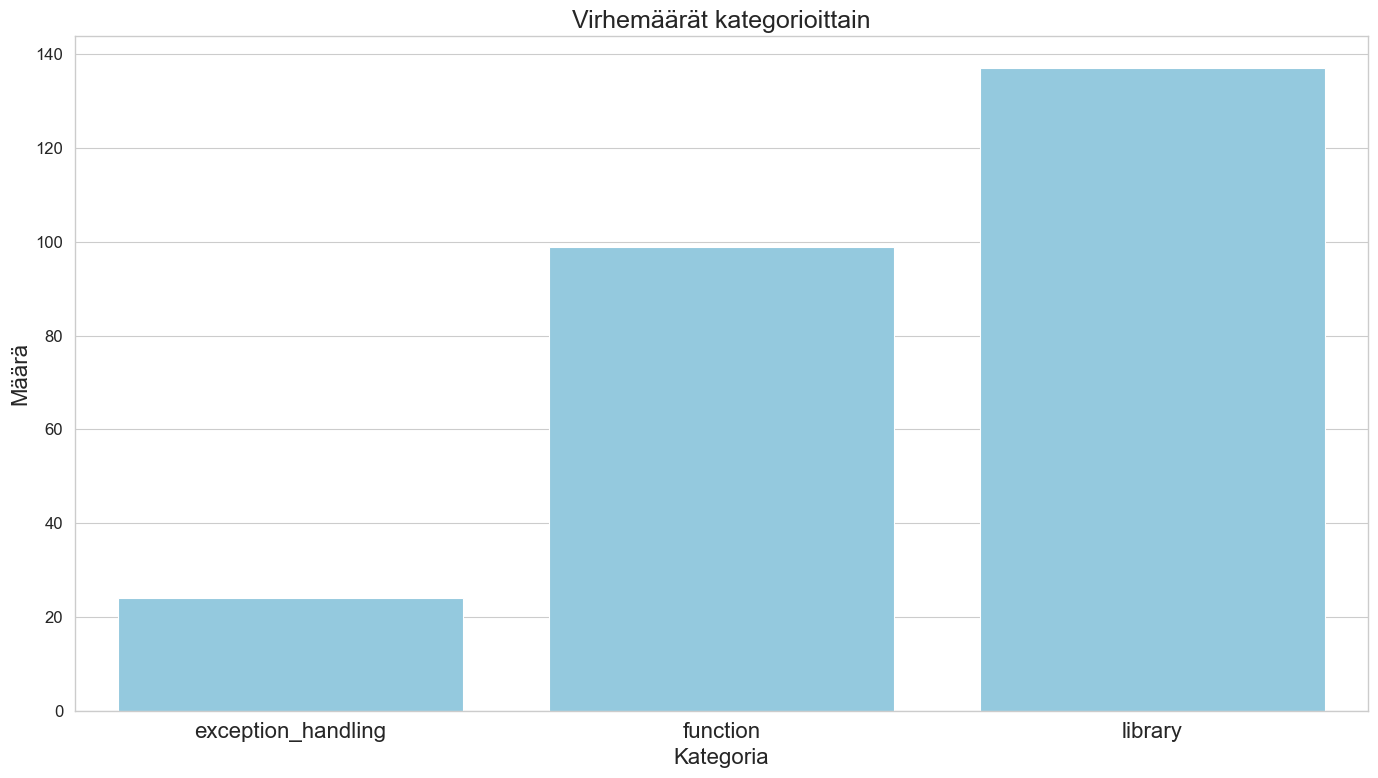

In [37]:
category_counts = df.groupby('category').size().reset_index(name='count')

#Plot by error category
plt.figure(figsize=(14, 8))
sns.barplot(data=category_counts, x='category', y='count', color='skyblue')
plt.title('Virhemäärät kategorioittain')
plt.xlabel('Kategoria')
plt.ylabel('Määrä')
plt.xticks(fontsize=16)
plt.tight_layout()

print(category_counts)

### 3. Calculating hourly average error ammounts by category

Each error is grouped by the hour of the day and it's category. Then the mean is calculated. The avegrages for each category are shown in a plot chart

    hour            category  count
0      7  exception_handling    6.0
1      9            function    3.0
2      9             library    2.0
3     10            function   40.0
4     10             library   24.0
5     13  exception_handling   12.0
6     13            function   26.0
7     13             library   55.0
8     14  exception_handling    6.0
9     14            function   26.0
10    14             library   54.0
11    21            function    2.0
12    21             library    1.0


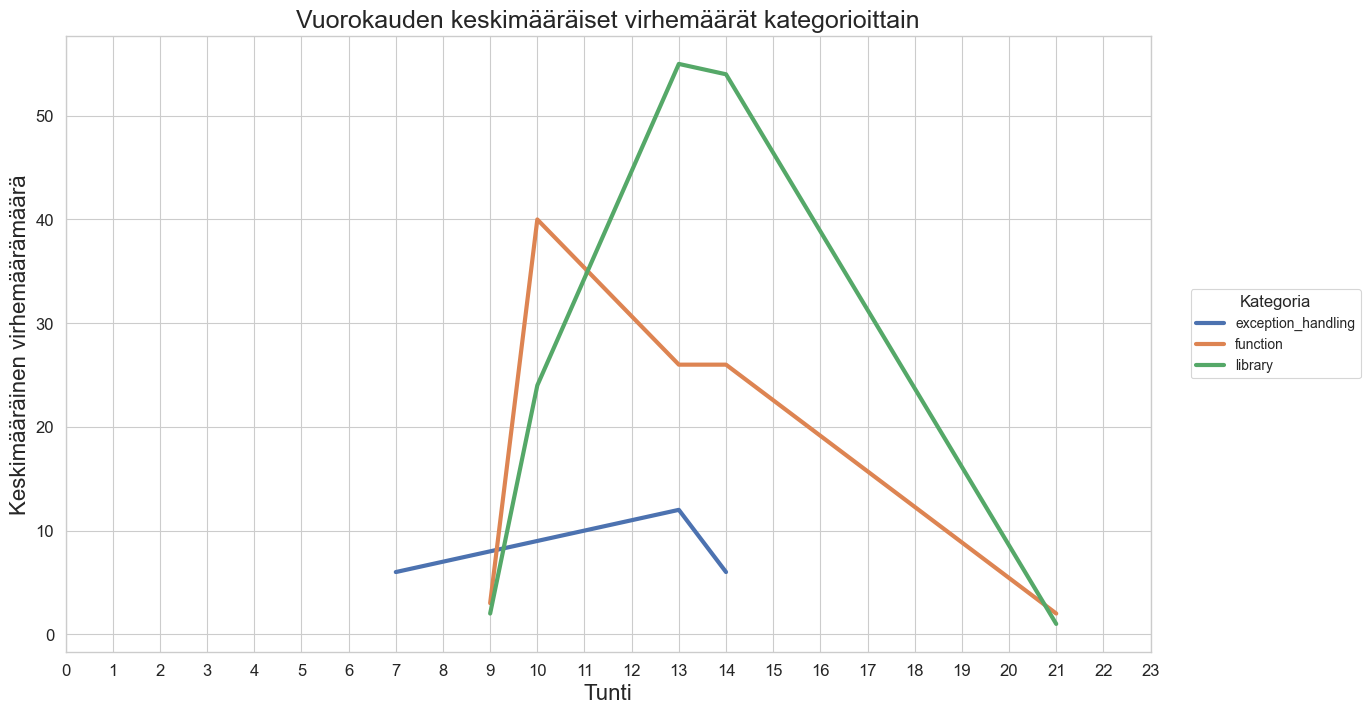

In [38]:
errors_df = pd.DataFrame(errors)

errors_df['hour'] = errors_df['time'].dt.hour
errors_df['date'] = errors_df['time'].dt.date  

# Count occurrences per (date, hour, category)
daily_hourly_counts = (
    errors_df.groupby(['date', 'hour', 'category'])
    .size()
    .reset_index(name='count')
)
# Compute the average hourly error count across different days
hourly_category_counts = (
    daily_hourly_counts.groupby(['hour', 'category'])['count']
    .mean()
    .reset_index()
)

print(hourly_category_counts)
plt.figure(figsize=(14, 8))
sns.lineplot(data=hourly_category_counts, x='hour', y='count', hue='category', linewidth=3)
plt.title('Vuorokauden keskimääräiset virhemäärät kategorioittain')
plt.xlabel('Tunti')
plt.ylabel('Keskimääräinen virhemäärämäärä')
plt.legend(title='Kategoria',bbox_to_anchor=(1.2, 0.6) )
plt.xticks(range(0, 24))
plt.grid(True)

### 4. Calculating the weekly total error ammounts by category

The errors are grouped by the week they were submitted and category. The they are plotted using a linechart

   week            category  count
0    39  exception_handling     18
1    39            function     59
2    39             library    113
3    40  exception_handling      6
4    40            function     40
5    40             library     24


Text(60.45555555555556, 0.5, 'Virhemäärä')

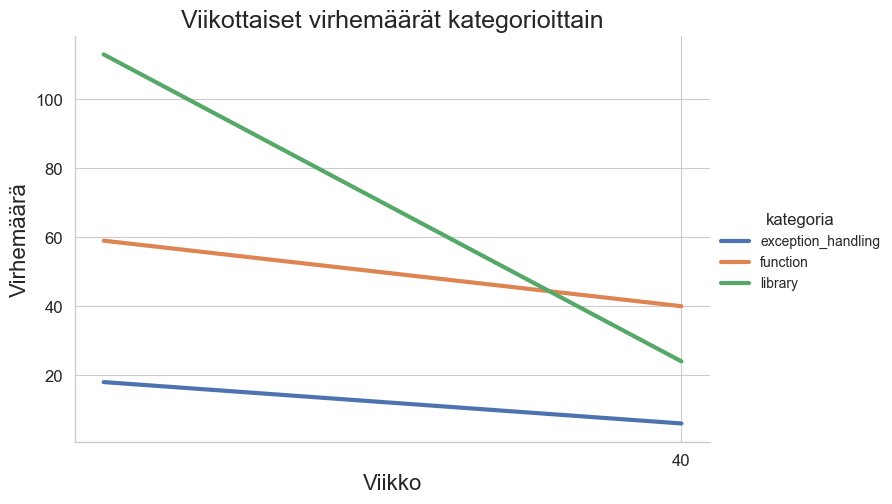

In [39]:
starting_week = 0
ending_week = 51

errors_df = pd.DataFrame(errors)

errors_df["week"] = errors_df["time"].dt.isocalendar().week

#Find the first and last week of submissions to limit chart size
starting_week = errors_df['week'].min()
ending_week = errors_df['week'].max()



weekly_category_counts = (
    errors_df.groupby(['week', 'category'])
    .size()
    .reset_index(name='count')
    .groupby(['week', 'category'])
    .sum()
    .reset_index()
)


print(weekly_category_counts)
weekly_category_counts=weekly_category_counts[weekly_category_counts["week"]!= 1]
weekly_category_counts.rename(columns={'category': 'kategoria',
                                       'count':'Määrä',
                                       'week':'Viikko'}, inplace=True)


sns.relplot(
    data=weekly_category_counts, kind = "line",
    x="Viikko", y="Määrä", hue='kategoria', linewidth=3, aspect=1.5
)
plt.xticks(range(40,ending_week + 1))
#plt.yscale('log')
plt.grid(True)
plt.title('Viikottaiset virhemäärät kategorioittain')                    
plt.xlabel('Viikko')
plt.ylabel('Virhemäärä')

### 5. Calculating the total weekly errors and comparing it to the test total test count

The total error counts and test counts for each week are counted. This is again plotted using a line chart to compare the two weekly variables

   week  count         category
0    39    190  Virheiden määrä
1    40     70  Virheiden määrä
2    39     11    Testien määrä
3    40     10    Testien määrä


Text(67.07187500000002, 0.5, 'Määrä')

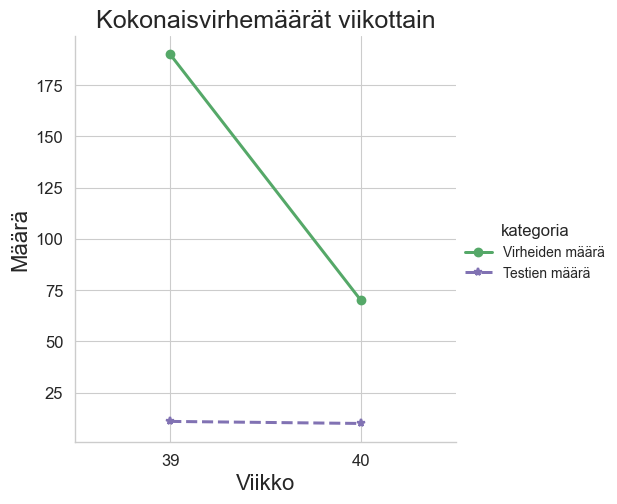

In [40]:
#Calculate weekly error counts
weekly_category_counts = (
    errors_df.groupby(['week'])
    .size()
    .reset_index(name='count')
)
weekly_category_counts['category'] = "Virheiden määrä"

#Calculate the total number of tests taken per week 
total_tests_per_week = (
    errors_df.groupby('week')['id']
    .nunique()
    .reset_index(name='count')
)

total_tests_per_week['category'] = 'Testien määrä'

#Combine the weekly error counts with the total tests data
weekly_category_counts = pd.concat([weekly_category_counts, total_tests_per_week], ignore_index=True)


print(weekly_category_counts)
weekly_category_counts=weekly_category_counts[weekly_category_counts["week"]!= 1]
weekly_category_counts.rename(columns={'category': 'kategoria'}, inplace=True)

sns.catplot(
    data=weekly_category_counts,
    x="week", y="count", hue='kategoria',
    palette={'Testien määrä': 'm', 'Virheiden määrä': 'g'},
    markers = ["o", "*"], linestyles = ["-", "--"],
    kind= 'point'
)

#plt.xticks(range(starting_week,ending_week + 1))
#plt.yscale('log')
plt.grid(True)
plt.title('Kokonaisvirhemäärät viikottain')
plt.xlabel('Viikko')
plt.ylabel('Määrä')


### 6. Calculating the average error count for consecutive submissions

The next code-block looks at when the user repeatedly returns the same files to ASPA. We use the users email and file names to try to determine if the submissions are from the same files. Then the time variable is used to group the submission by return order. Then the averages are calulated and line plotted.

submission_order
1    11.333333
2    18.000000
3    18.333333
4    16.000000
5     5.000000
6     4.500000
7     6.000000
8     4.000000
Name: total, dtype: float64
submission_order
1    6
2    3
3    3
4    3
5    2
6    2
7    2
8    1
Name: count, dtype: int64


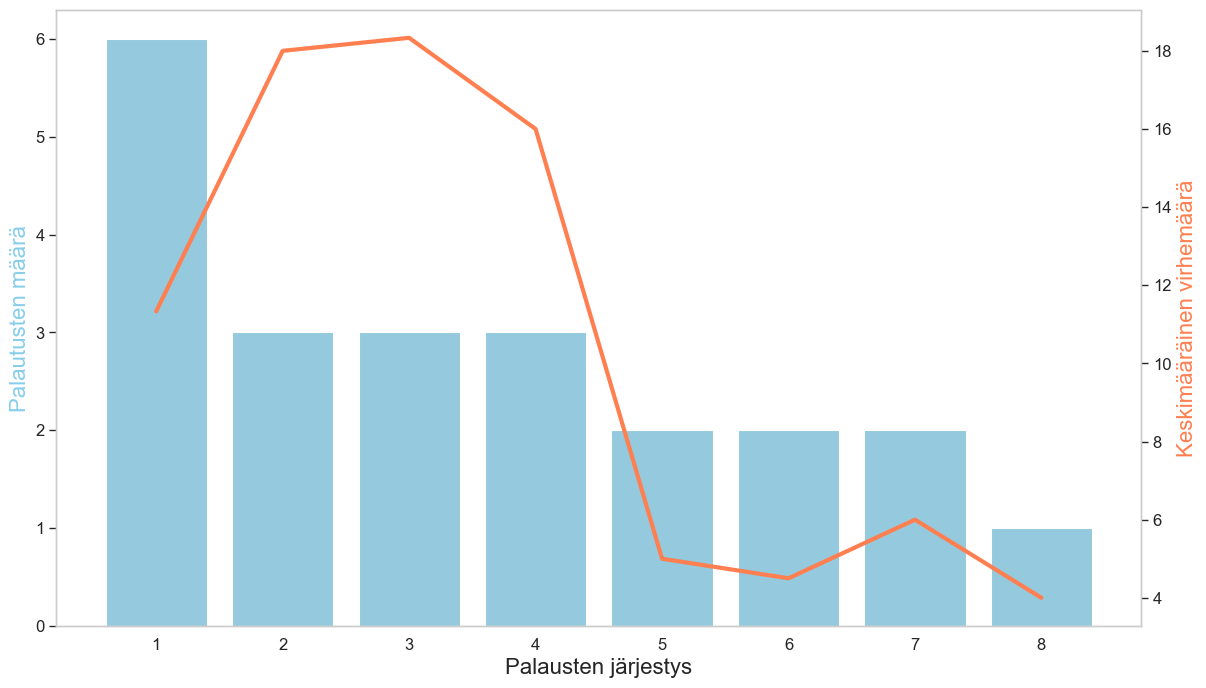

In [41]:
errors = errors_per_return(data)

error_df = pd.DataFrame(errors)

# Sorting by email, filenames, and time
df = error_df.sort_values(by=['email', 'filenames', 'time']).reset_index(drop=True)

# Grouping by email and filenames, then assigning a submission order for each file
df['submission_order'] = df.groupby(['email', 'filenames']).cumcount() + 1

#print(df)

# Calculating the average total mistakes per submission order
avg_mistakes_per_submission = df.groupby('submission_order')['total'].mean()
print(avg_mistakes_per_submission)
# Counting the total number of submissions at each submission order step
submission_counts = df['submission_order'].value_counts().sort_index()
print(submission_counts)

fig, ax1 = plt.subplots()
sns.barplot(x=submission_counts.index, y=submission_counts.values, ax=ax1, color='skyblue')

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(x=avg_mistakes_per_submission.index-1, y=avg_mistakes_per_submission.values, ax=ax2, color='coral', linewidth=3)
#sns.regplot(x=avg_mistakes_per_submission.index-1, y=avg_mistakes_per_submission.values, scatter=False, ci=None, color="red", label="Trend Line")

ax1.set_xlabel('Palausten järjestys')
ax1.set_ylabel('Palautusten määrä', color='skyblue')
ax1.grid(False)
ax2.set_ylabel('Keskimääräinen virhemäärä', color='coral')
ax2.grid(False)



### 7. Calculating the average error count by category for consecutive submissions

The next code-block looks at when the user repeatedly returns the same files to ASPA. Now we look at the average ammounts for each category of errors. Again a lineplot is then used to visualize the changes

   submission_order  basic  function    library  exception_handling  \
0                 1    0.0  4.000000   6.333333                 1.0   
1                 2    0.0  5.666667  10.333333                 2.0   
2                 3    0.0  6.000000  10.333333                 2.0   
3                 4    0.0  5.666667  10.333333                 0.0   
4                 5    0.0  4.000000   1.000000                 0.0   
5                 6    0.0  3.500000   1.000000                 0.0   
6                 7    0.0  2.500000   0.500000                 3.0   
7                 8    0.0  3.000000   1.000000                 0.0   

   file_handling  data_structures  
0            0.0              0.0  
1            0.0              0.0  
2            0.0              0.0  
3            0.0              0.0  
4            0.0              0.0  
5            0.0              0.0  
6            0.0              0.0  
7            0.0              0.0  


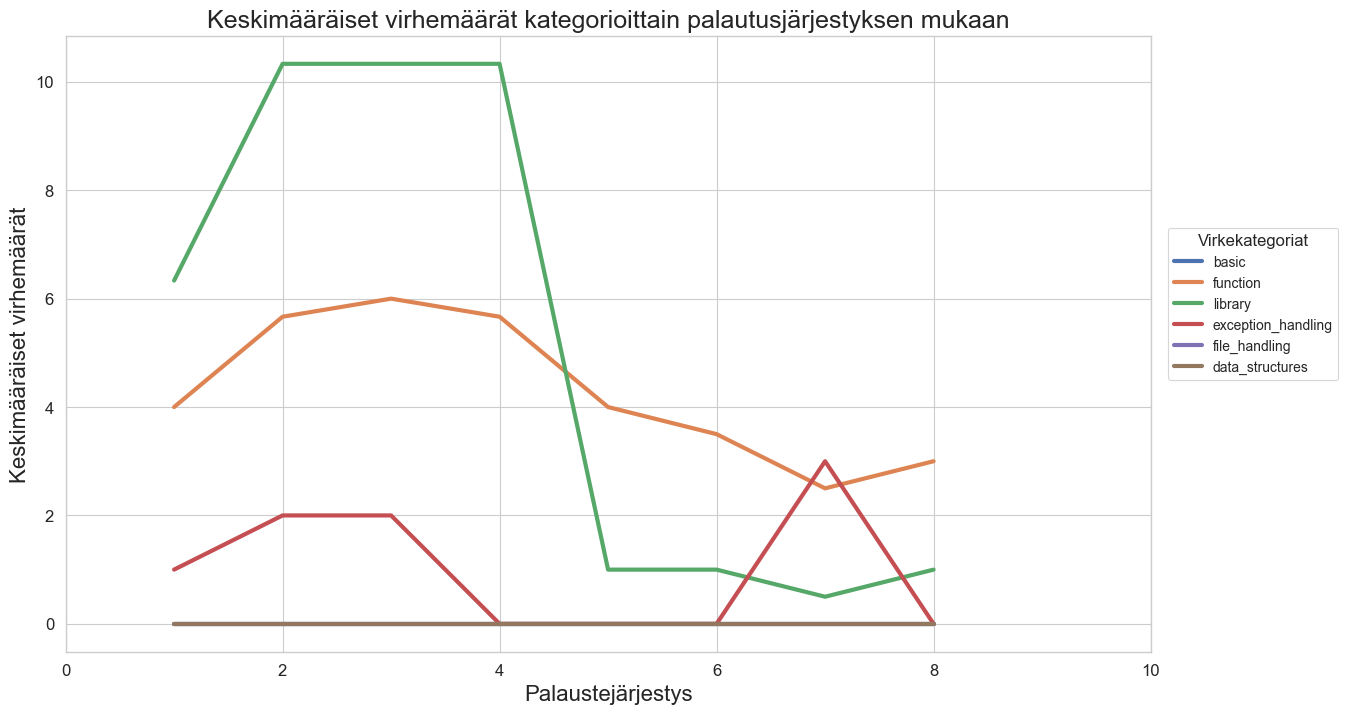

In [47]:
cut_off = 10

error_df = error_df.sort_values(by=['email', 'filenames', 'time']).reset_index(drop=True)

# Grouping by email and filenames, then assigning a submission order for each file
error_df['submission_order'] = error_df.groupby(['email', 'filenames']).cumcount() + 1

# Calculating the average mistakes per submission order for each category
categories = ['basic', 'function', 'library', 'exception_handling', 'file_handling', 'data_structures']

# Filtering categories to include only those that exist in the DataFrame
available_categories = [col for col in categories if col in error_df.columns]

avg_mistakes_per_category = error_df.groupby('submission_order')[available_categories].mean().fillna(0).reset_index()

print(avg_mistakes_per_category)

plt.figure()
for category in available_categories:
    sns.lineplot(data=avg_mistakes_per_category, x='submission_order', y=category, label=category, linewidth=3)


plt.xlim(0, cut_off);
plt.xlabel("Palaustejärjestys")
plt.ylabel("Keskimääräiset virhemäärät")
plt.title("Keskimääräiset virhemäärät kategorioittain palautusjärjestyksen mukaan")
plt.legend(title="Virkekategoriat",bbox_to_anchor=(1.01, 0.7), loc='upper left' )
plt.grid(True)



### 8. Visualizing each submission by it's most common error category and total error ammount

Utilizing a point scatter plot we look at each submission as a dot where it's color shows the most common error category and size the ammount of this category of error. The y-axis visualizes the total error ammount and x-axis the time.

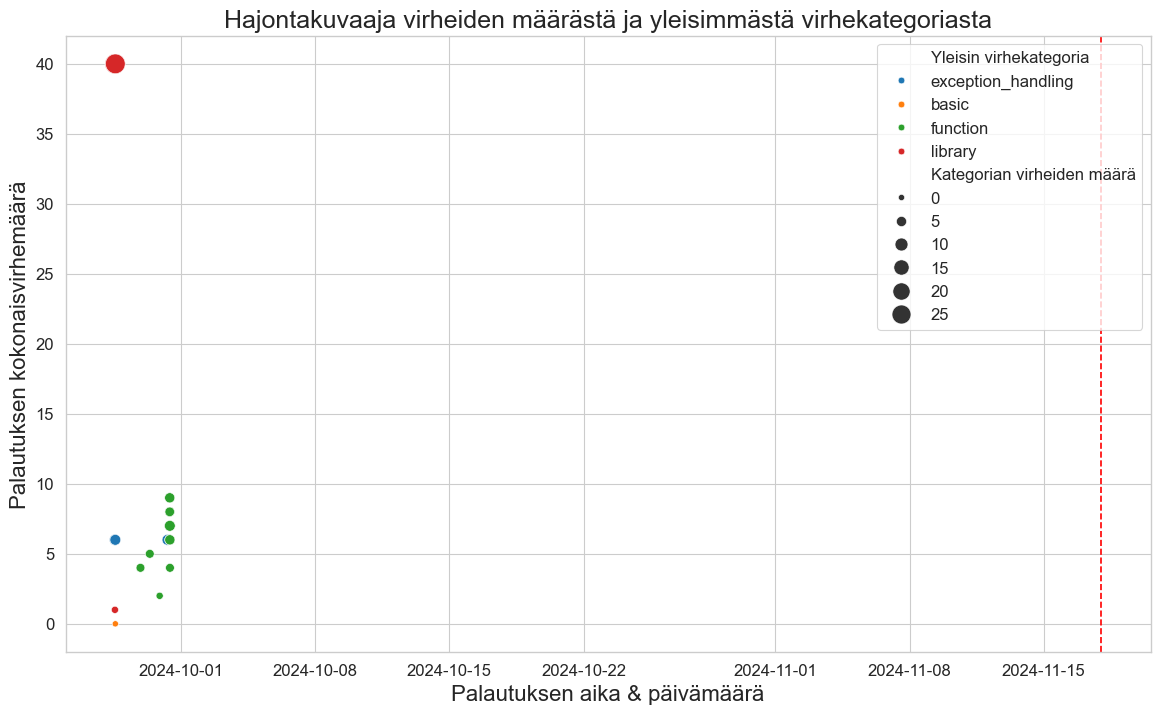

In [48]:
import datetime

project_deadline = datetime.datetime(2024, 11, 18)

errors= errors_per_return(data)

error_df = pd.DataFrame(errors)

error_columns = ['basic', 'function', 'library', 'exception_handling', 'file_handling', 'data_structures']


df['Yleisin virhekategoria'] = df[error_columns].idxmax(axis=1)
df['Kategorian virheiden määrä'] = df[error_columns].max(axis=1)

# Example plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.scatterplot(
    data=df,
    x='time',
    y='total',
    hue='Yleisin virhekategoria',
    size='Kategorian virheiden määrä',
    palette='tab10',
    sizes=(20, 200)
)
plt.title('Hajontakuvaaja virheiden määrästä ja yleisimmästä virhekategoriasta')
plt.axvline(x=project_deadline, color='red', linestyle='--')
plt.xlabel('Palautuksen aika & päivämäärä')
plt.ylabel('Palautuksen kokonaisvirhemäärä')
plt.legend(loc='upper right', fontsize=12)
plt.show()



### 9. Vizualizing the total error ammounts in submissions by week

Utilizing the violin plot to visualize the spread of total error ammounts submissions. The data is categorzed by the return week. Dots represent an individual submission with the y-axis representing the total error ammount and x-axis the time. 

In [ ]:


# Calculate errors for each submission
errors = errors_per_return(data)
error_df = pd.DataFrame(errors)

#print(error_df)



# Print the results
#print(f"First Submissions: {first_zero_errors} with zero errors, {first_with_errors} with error s")
#print(f"Last Submissions: {last_zero_errors} with zero errors, {last_with_errors} with errors")
